<a href="https://colab.research.google.com/github/hucarlos08/GEO-ML/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The **perceptron** is a machine learning model developed in the 1950s by Frank Rosenblatt. It is a binary classification algorithm based on the concept of an artificial neuron that gets activated or deactivated based on a linear combination of its inputs.

The perceptron takes a set of inputs, each weighted by a corresponding weight, and calculates the weighted sum. It then applies an activation function, which is typically a step function or a sign function, to determine the output of the perceptron. The output will be 1 if the weighted sum exceeds a threshold, and 0 otherwise.

Mathematically, the computation of the perceptron can be expressed as follows:

```
Inputs: x = [x₁, x₂, ..., xn]
Weights: w = [w₁, w₂, ..., wn]
Threshold: b

Weighted sum: z = w₁x₁ + w₂x₂ + ... + wnxn + b
Output: y = f(z)
```

Here, `f(z)` represents the activation function.

The limitations of the perceptron include its inability to solve problems that are not linearly separable. In other words, if the input data cannot be separated into two classes by a straight line or a hyperplane, the perceptron will not be able to find a solution. Additionally, the perceptron can be sensitive to the initialization of weights and may require a significant number of iterations to converge on more complex problems.

Despite its limitations, the perceptron is historically significant because it was one of the earliest proposed machine learning models. It laid the foundation for the development of more complex neural networks and deep learning models. Furthermore, the perceptron demonstrated that machines could learn from examples and perform classification tasks, which propelled the field of machine learning and paved the way for the development of more sophisticated algorithms.

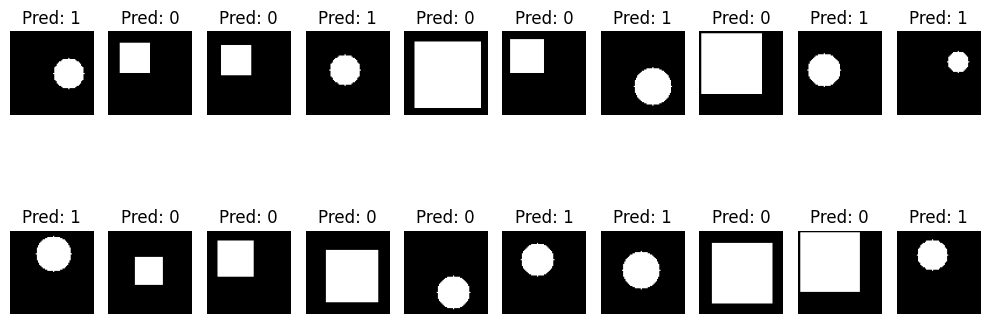

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Función para generar imágenes de cuadrados y círculos
def generate_images(num_images, image_size):
    images = []
    labels = []

    for _ in range(num_images):
        image = np.zeros((image_size, image_size))
        label = np.random.choice([0, 1])  # 0 para cuadrado, 1 para círculo

        if label == 0:  # Cuadrado
            top_left = np.random.randint(0, image_size//2)
            bottom_right = np.random.randint(image_size//2, image_size)
            image[top_left:bottom_right, top_left:bottom_right] = 1
        else:  # Círculo
            center = np.random.randint(image_size//4, 3*image_size//4, size=2)
            radius = np.random.randint(image_size//8, image_size//4)

            for i in range(image_size):
                for j in range(image_size):
                    if (i-center[0])**2 + (j-center[1])**2 <= radius**2:
                        image[i, j] = 1

        images.append(image)
        labels.append(label)

    return np.array(images), np.array(labels)

# Función de activación (step function)
def activation(x):
    return 1 if x >= 0 else 0

# Función de predicción
def predict(image, weights, bias):
    flattened_image = image.flatten()
    z = np.dot(flattened_image, weights) + bias
    return activation(z)

# Función de entrenamiento del perceptrón
def train_perceptron(images, labels, learning_rate, num_epochs):
    num_features = images.shape[1] * images.shape[2]
    weights = np.random.randn(num_features)
    bias = np.random.randn(1)

    weights_lst = []
    bias_lst = []

    for e in range(num_epochs):
      for j in range(images.shape[0]):
        image = images[j]
        label = labels[j]
        y_pred = predict(image, weights, bias)

        error = label - y_pred
        weights += learning_rate * error * image.flatten()
        bias += learning_rate * error
      weights_lst.append(weights.copy())
      bias_lst.append(bias.copy())

    return weights_lst, bias_lst

# Generar imágenes de entrenamiento
num_train_images = 1000
image_size = 72
train_images, train_labels = generate_images(num_train_images, image_size)

# Entrenar el perceptrón
learning_rate = 0.1
num_epochs = 500
weights_lst, bias_lst = train_perceptron(train_images, train_labels, learning_rate, num_epochs)

# Realizar predicciones en las imágenes de prueba
# Generar imágenes de prueba
num_test_images = 20
test_images, test_labels = generate_images(num_test_images, image_size)

predictions = []
f = plt.figure(figsize=(10,5))
for i in range(num_test_images):
    image = test_images[i]
    label = test_labels[i]
    prediction = predict(image, weights_lst[-1], bias_lst[-1])
    predictions.append(prediction)
    plt.subplot(2, 10, i+1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title('Pred: {}'.format(prediction))

plt.tight_layout()
plt.show()

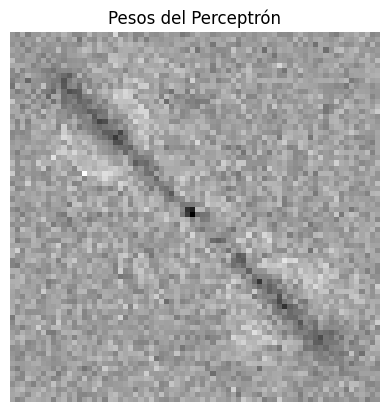

In [3]:
# Visualizar los pesos como una imagen
final_weights = weights_lst[-1]  # Últimos pesos después del entrenamiento
final_weights_image = final_weights.reshape(image_size, image_size)  # Reshape a matriz bidimensional

plt.imshow(final_weights_image, cmap='gray', vmin = weights_lst[-1].min(), vmax = weights_lst[-1].max())
plt.axis('off')
plt.title('Pesos del Perceptrón')
plt.show()